In [58]:
# importing the required libraries
import pandas as pd

# Visualisation libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as pyo
from plotly.offline import init_notebook_mode,iplot
import cufflinks as cf
import numpy as np

# Manipulating the default plot size
#plt.rcParams['figure.figsize'] = 10, 12
plt.rcParams['figure.figsize']=25,18
# Disable warnings 
import warnings
warnings.filterwarnings('ignore')

In [59]:
pyo.init_notebook_mode(connected=True)
cf.go_offline()

# Reading the datasets

In [3]:
df = pd.read_csv("C:/Users/Abhishek kumar/Downloads/archive (3)/covid_19_data.csv")

In [4]:
df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [5]:
df.shape

(285307, 8)

In [6]:
df.rename(columns = {'Country/Region':'Country'}, inplace=True)

In [7]:
df.head()

,SNo,ObservationDate,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [8]:
df.rename(columns={'Province/State':'State'}, inplace = True)

In [9]:
df.tail()

,SNo,ObservationDate,State,Country,Last Update,Confirmed,Deaths,Recovered
285302,285303,05/02/2021,Zaporizhia Oblast,Ukraine,2021-05-03 04:20:39,96531.0,1919.0,78700.0
285303,285304,05/02/2021,Zeeland,Netherlands,2021-05-03 04:20:39,26045.0,233.0,0.0
285304,285305,05/02/2021,Zhejiang,Mainland China,2021-05-03 04:20:39,1344.0,1.0,1322.0
285305,285306,05/02/2021,Zhytomyr Oblast,Ukraine,2021-05-03 04:20:39,84641.0,1597.0,68529.0
285306,285307,05/02/2021,Zuid-Holland,Netherlands,2021-05-03 04:20:39,359327.0,4138.0,0.0


# DATA ANALYSIS

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285307 entries, 0 to 285306
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   SNo              285307 non-null  int64  
 1   ObservationDate  285307 non-null  object 
 2   State            212318 non-null  object 
 3   Country          285307 non-null  object 
 4   Last Update      285307 non-null  object 
 5   Confirmed        285307 non-null  float64
 6   Deaths           285307 non-null  float64
 7   Recovered        285307 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 17.4+ MB


In [11]:
df.isnull().sum()

SNo                    0
ObservationDate        0
State              72989
Country                0
Last Update            0
Confirmed              0
Deaths                 0
Recovered              0
dtype: int64

In [12]:
## for normalizing data from e+05 to normal form

pd.options.display.float_format ='{:.2f}'.format 

In [13]:
df.describe()

,SNo,Confirmed,Deaths,Recovered
count,285307.00,285307.00,285307.00,285307.00
mean,142654.00,76629.23,1867.33,44784.23
std,82361.18,246617.59,5905.57,178803.00
min,1.00,-302844.00,-178.00,-854405.00
25%,71327.50,970.00,12.00,11.00
50%,142654.00,9181.00,172.00,1552.00
75%,213980.50,45618.00,1181.00,17935.00
max,285307.00,5605532.00,112182.00,6399531.00


# DATA VISUALIZATION

In [14]:
#df.style.background_gradient(cmap='Reds')

In [15]:
death =df.groupby('ObservationDate').sum()['Deaths'].reset_index()
death

,ObservationDate,Deaths
0,01/01/2021,1834604.00
1,01/02/2021,1843036.00
2,01/03/2021,1850377.00
3,01/04/2021,1860524.00
4,01/05/2021,1875878.00
...,...,...
462,12/27/2020,1771594.00
463,12/28/2020,1781349.00
464,12/29/2020,1796718.00
465,12/30/2020,1811773.00


In [16]:
recovered = df.groupby('ObservationDate').sum()['Recovered'].reset_index()
recovered

,ObservationDate,Recovered
0,01/01/2021,47313005.00
1,01/02/2021,47614297.00
2,01/03/2021,47882779.00
3,01/04/2021,48173187.00
4,01/05/2021,48488548.00
...,...,...
462,12/27/2020,45717710.00
463,12/28/2020,46016136.00
464,12/29/2020,46369231.00
465,12/30/2020,46757476.00


In [17]:
confirmed = df.groupby('ObservationDate').sum()['Confirmed'].reset_index()
confirmed

,ObservationDate,Confirmed
0,01/01/2021,84092619.00
1,01/02/2021,84718978.00
2,01/03/2021,85251774.00
3,01/04/2021,85805892.00
4,01/05/2021,86546014.00
...,...,...
462,12/27/2020,80912611.00
463,12/28/2020,81408934.00
464,12/29/2020,82073362.00
465,12/30/2020,82834592.00


In [ ]:
confirmed.plot(kind ='bar',x ='ObservationDate',y ='Confirmed')
plt.show()

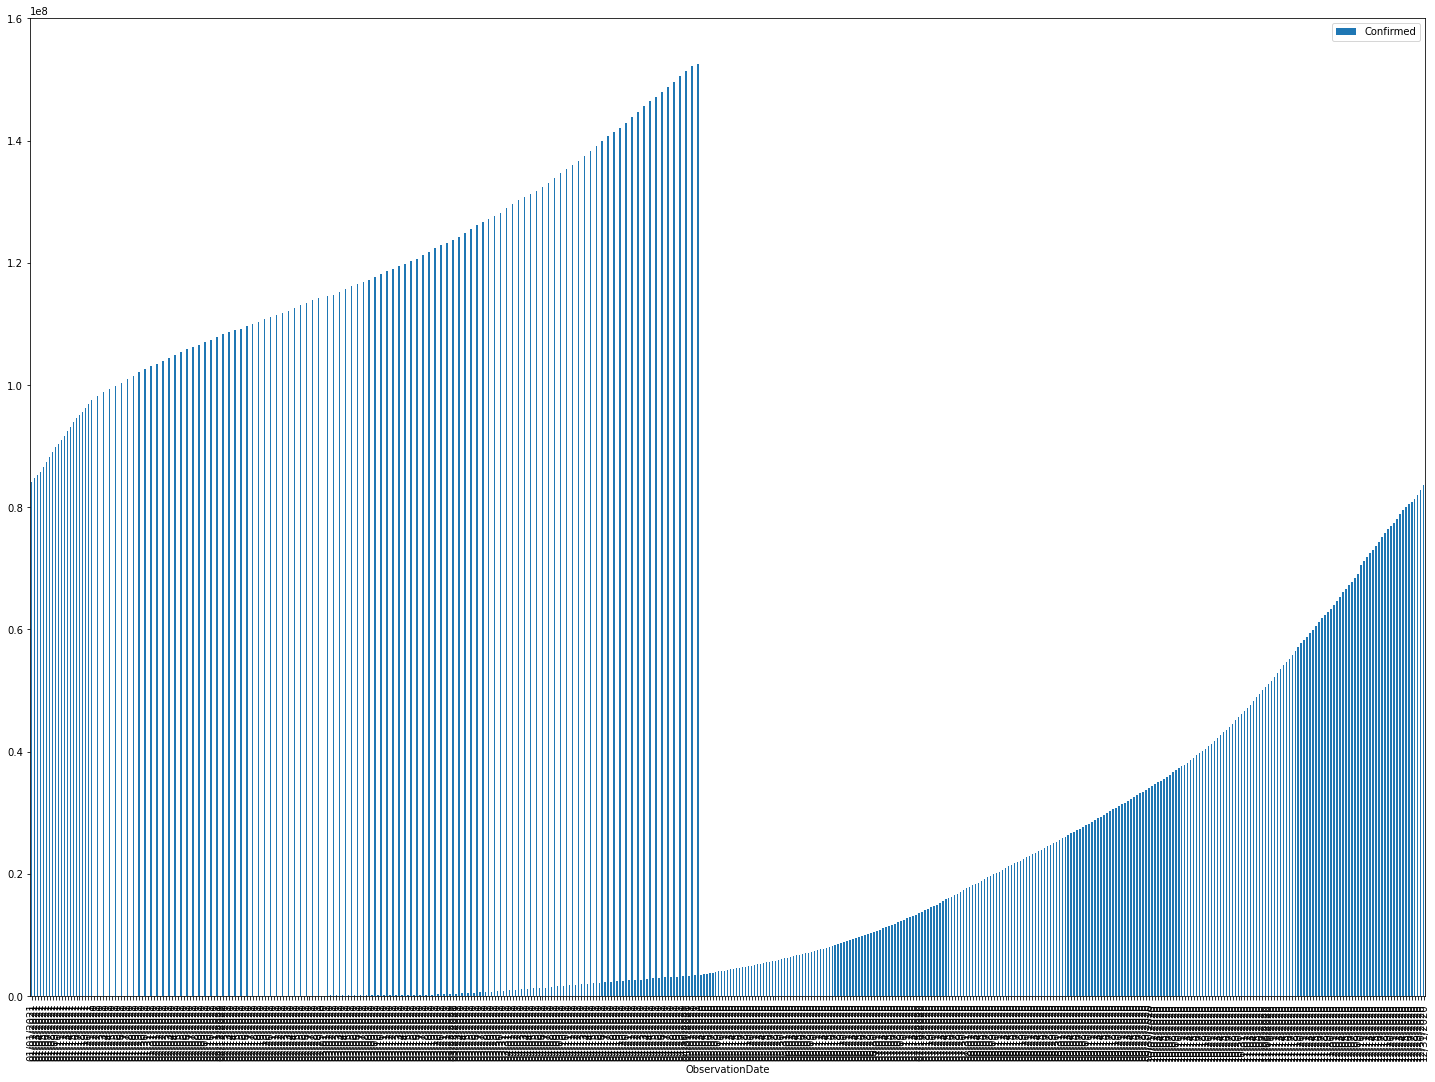

In [18]:
#Pandas vis

confirmed.plot(kind ='bar',x ='ObservationDate',y ='Confirmed')
plt.show()

<AxesSubplot:xlabel='ObservationDate', ylabel='Confirmed'>

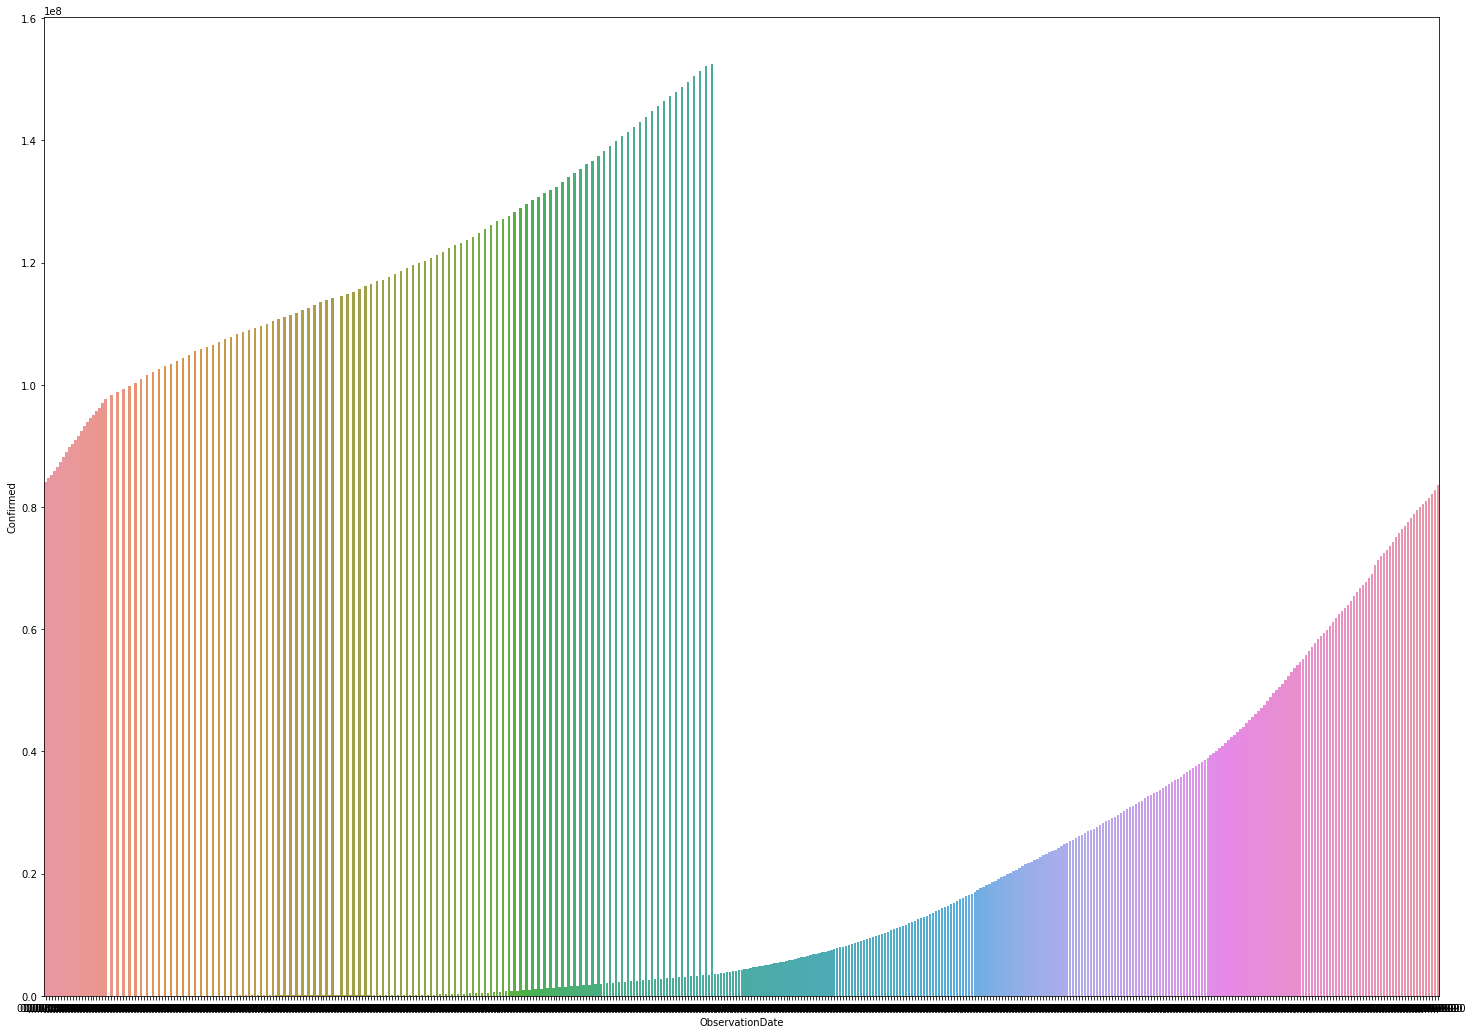

In [19]:
sns.barplot(x =confirmed['ObservationDate'],y=confirmed['Confirmed'])

<AxesSubplot:xlabel='ObservationDate', ylabel='Confirmed'>

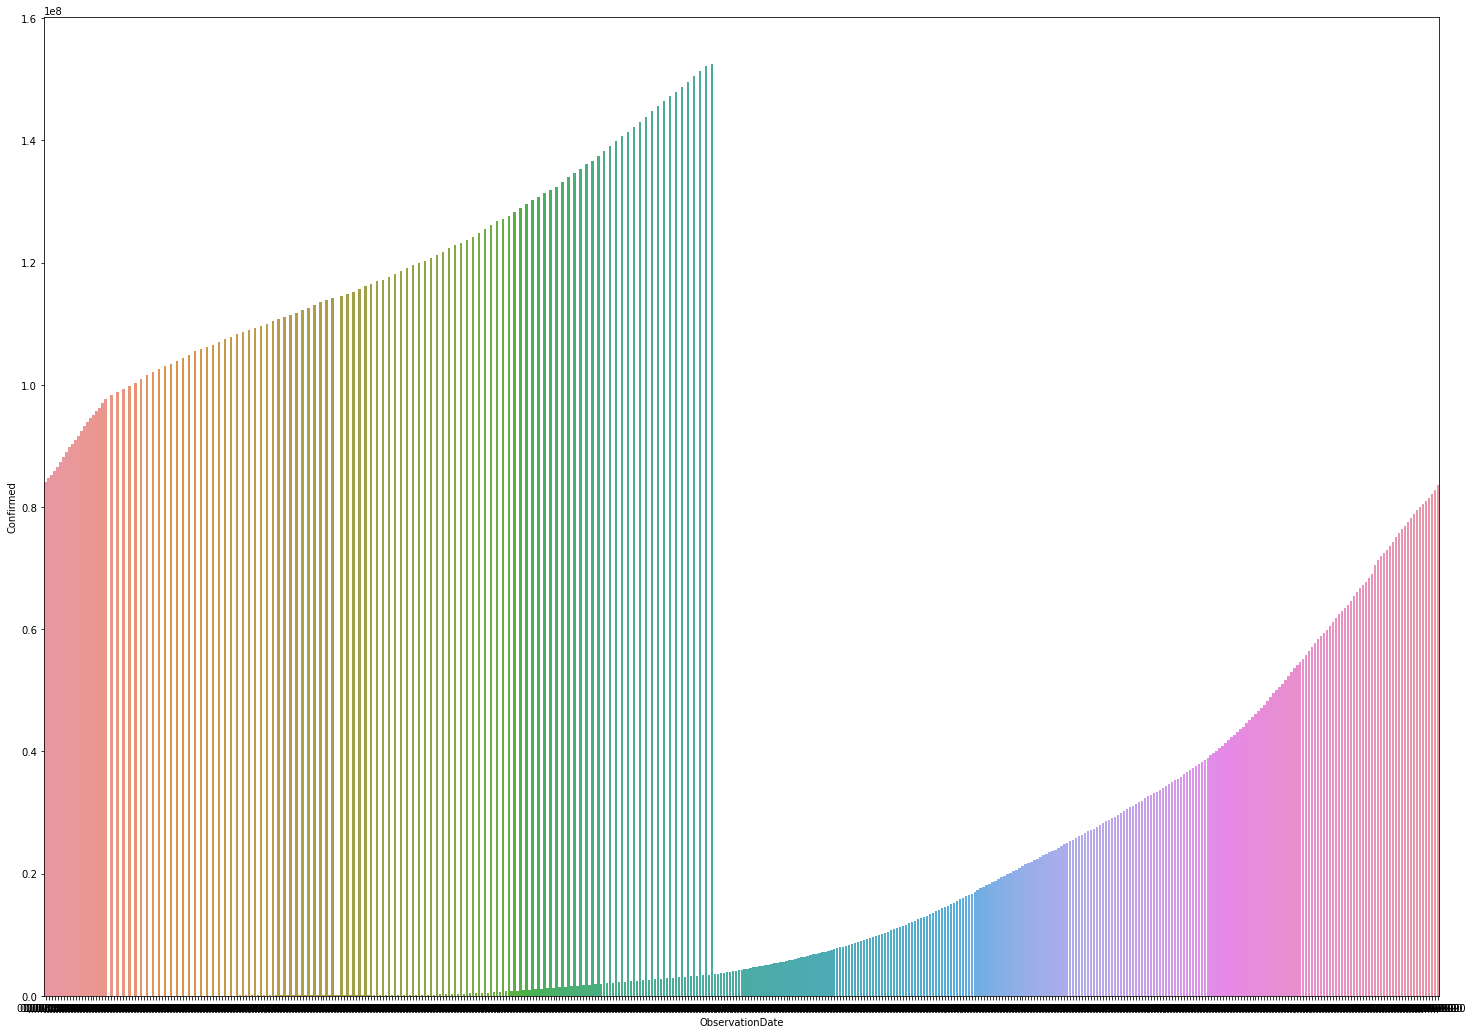

In [20]:
#seaborn
sns.barplot(x =confirmed['ObservationDate'],y=confirmed['Confirmed'])

In [21]:
#plotly

confirmed.iplot(kind='bar',x='ObservationDate',y='Confirmed',xTitle='ObservationDate',yTitle="Confirmed")

In [22]:
death.iplot(kind='bar',x='ObservationDate',y='Deaths',xTitle='ObservationDate',yTitle="Deaths")

In [23]:
recovered.iplot(kind='bar',x='ObservationDate',y='Recovered',xTitle='ObservationDate',yTitle="Recovered")

# Making the Prediction using FB Prophet

In [24]:
from fbprophet import Prophet

In [25]:
death =df.groupby('ObservationDate').sum()['Deaths'].reset_index()
death

,ObservationDate,Deaths
0,01/01/2021,1834604.00
1,01/02/2021,1843036.00
2,01/03/2021,1850377.00
3,01/04/2021,1860524.00
4,01/05/2021,1875878.00
...,...,...
462,12/27/2020,1771594.00
463,12/28/2020,1781349.00
464,12/29/2020,1796718.00
465,12/30/2020,1811773.00


In [26]:
confirmed.head()

,ObservationDate,Confirmed
0,01/01/2021,84092619.00
1,01/02/2021,84718978.00
2,01/03/2021,85251774.00
3,01/04/2021,85805892.00
4,01/05/2021,86546014.00


In [27]:
confirmed.tail()

,ObservationDate,Confirmed
462,12/27/2020,80912611.00
463,12/28/2020,81408934.00
464,12/29/2020,82073362.00
465,12/30/2020,82834592.00
466,12/31/2020,83559601.00


In [28]:
recovered = df.groupby('ObservationDate').sum()['Recovered'].reset_index()
recovered

,ObservationDate,Recovered
0,01/01/2021,47313005.00
1,01/02/2021,47614297.00
2,01/03/2021,47882779.00
3,01/04/2021,48173187.00
4,01/05/2021,48488548.00
...,...,...
462,12/27/2020,45717710.00
463,12/28/2020,46016136.00
464,12/29/2020,46369231.00
465,12/30/2020,46757476.00


In [29]:
recovered.head()

,ObservationDate,Recovered
0,01/01/2021,47313005.00
1,01/02/2021,47614297.00
2,01/03/2021,47882779.00
3,01/04/2021,48173187.00
4,01/05/2021,48488548.00


In [30]:
recovered.tail()

,ObservationDate,Recovered
462,12/27/2020,45717710.00
463,12/28/2020,46016136.00
464,12/29/2020,46369231.00
465,12/30/2020,46757476.00
466,12/31/2020,47032627.00


In [31]:
death =df.groupby('ObservationDate').sum()['Deaths'].reset_index()
death

,ObservationDate,Deaths
0,01/01/2021,1834604.00
1,01/02/2021,1843036.00
2,01/03/2021,1850377.00
3,01/04/2021,1860524.00
4,01/05/2021,1875878.00
...,...,...
462,12/27/2020,1771594.00
463,12/28/2020,1781349.00
464,12/29/2020,1796718.00
465,12/30/2020,1811773.00


In [32]:
death.head()

,ObservationDate,Deaths
0,01/01/2021,1834604.00
1,01/02/2021,1843036.00
2,01/03/2021,1850377.00
3,01/04/2021,1860524.00
4,01/05/2021,1875878.00


In [33]:
death.tail()

,ObservationDate,Deaths
462,12/27/2020,1771594.00
463,12/28/2020,1781349.00
464,12/29/2020,1796718.00
465,12/30/2020,1811773.00
466,12/31/2020,1824942.00


The input to Prophet is always a dataframe with two columns: ds and y. The ds (datestamp) column should be of a format expected by Pandas, ideally YYYY-MM-DD for a date or YYYY-MM-DD HH:MM:SS for a timestamp. The y column must be numeric, and represents the measurement we wish to forecast.

In [34]:
#confirmed['ds'] = confirmed['ds'].dt.date #yy-mm-date
confirmed.columns = ['ds','y']
confirmed

,ds,y
0,01/01/2021,84092619.00
1,01/02/2021,84718978.00
2,01/03/2021,85251774.00
3,01/04/2021,85805892.00
4,01/05/2021,86546014.00
...,...,...
462,12/27/2020,80912611.00
463,12/28/2020,81408934.00
464,12/29/2020,82073362.00
465,12/30/2020,82834592.00


In [35]:
confirmed['ds'] = pd.to_datetime(confirmed['ds'])
confirmed

,ds,y
0,2021-01-01,84092619.00
1,2021-01-02,84718978.00
2,2021-01-03,85251774.00
3,2021-01-04,85805892.00
4,2021-01-05,86546014.00
...,...,...
462,2020-12-27,80912611.00
463,2020-12-28,81408934.00
464,2020-12-29,82073362.00
465,2020-12-30,82834592.00


In [36]:
confirmed.tail()

,ds,y
462,2020-12-27,80912611.00
463,2020-12-28,81408934.00
464,2020-12-29,82073362.00
465,2020-12-30,82834592.00
466,2020-12-31,83559601.00


 4.1 Forecasting Confirmed NCOVID-19 Cases Worldwide with Prophet (Base model)
 
 Generating a week ahead forecast of confirmed cases of NCOVID-19 using Prophet, with 95% prediction interval by creating a base model with no tweaking of seasonality-related parameters and additional regressors.

In [37]:
pd.set_option('display.max.rows',None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [38]:
m = Prophet(interval_width=0.95)
m.fit(confirmed)
future = m.make_future_dataframe(periods=20)

INFO:numexpr.utils:Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [39]:
future.tail(15)

,ds
472,2021-05-08
473,2021-05-09
474,2021-05-10
475,2021-05-11
476,2021-05-12
477,2021-05-13
478,2021-05-14
479,2021-05-15
480,2021-05-16
481,2021-05-17


In [40]:
#predicting the future with date, and upper and lower limit of y value
forecast = m.predict(future)

In [41]:
forecast.tail(100)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
387,2021-02-12,107273318.892,105357122.245,109312753.467,107273318.892,107273318.892,68467.786,68467.786,68467.786,68467.786,68467.786,68467.786,0.000,0.000,0.000,107341786.678
388,2021-02-13,107780188.193,105988772.688,109805097.410,107780188.193,107780188.193,77352.080,77352.080,77352.080,77352.080,77352.080,77352.080,0.000,0.000,0.000,107857540.273
389,2021-02-14,108287057.493,106235713.925,110291338.043,108287057.493,108287057.493,34571.734,34571.734,34571.734,34571.734,34571.734,34571.734,0.000,0.000,0.000,108321629.226
390,2021-02-15,108793926.793,106651610.692,110746409.970,108793926.793,108793926.793,-86919.393,-86919.393,-86919.393,-86919.393,-86919.393,-86919.393,0.000,0.000,0.000,108707007.400
391,2021-02-16,109300796.093,107260857.067,111185454.719,109300796.093,109300796.093,-79845.345,-79845.345,-79845.345,-79845.345,-79845.345,-79845.345,0.000,0.000,0.000,109220950.748
392,2021-02-17,109807665.393,107657789.001,111636774.245,109807665.393,109807665.393,-37080.783,-37080.783,-37080.783,-37080.783,-37080.783,-37080.783,0.000,0.000,0.000,109770584.610
393,2021-02-18,110314534.694,108330359.439,112261229.752,110314534.694,110314534.694,23453.921,23453.921,23453.921,23453.921,23453.921,23453.921,0.000,0.000,0.000,110337988.615
394,2021-02-19,110821403.994,108889514.205,112953980.360,110821403.994,110821403.994,68467.786,68467.786,68467.786,68467.786,68467.786,68467.786,0.000,0.000,0.000,110889871.779
395,2021-02-20,111328273.294,109545625.777,113383511.190,111328273.294,111328273.294,77352.080,77352.080,77352.080,77352.080,77352.080,77352.080,0.000,0.000,0.000,111405625.374
396,2021-02-21,111835142.594,109804505.768,113822430.585,111835142.594,111835142.594,34571.734,34571.734,34571.734,34571.734,34571.734,34571.734,0.000,0.000,0.000,111869714.328


The predict method will assign each row in future a predicted value which it names yhat. If you pass in historical dates, it will provide an in-sample fit. The forecast object here is a new dataframe that includes a column yhat with the forecast, as well as columns for components and uncertainty intervals.

In [42]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(140)

,ds,yhat,yhat_lower,yhat_upper
347,2021-01-03,85681289.962,83570954.262,87751956.123
348,2021-01-04,86201851.041,84309144.478,88234560.271
349,2021-01-05,86850977.294,84836045.325,88801279.611
350,2021-01-06,87535794.061,85533979.416,89407570.718
351,2021-01-07,88238380.970,86209470.987,90147808.078
352,2021-01-08,88925447.039,86915652.018,90953072.823
353,2021-01-09,89576383.538,87568678.234,91562788.590
354,2021-01-10,90175655.397,88169689.051,92325355.039
355,2021-01-11,90696216.475,88773762.578,92725957.717
356,2021-01-12,91345342.728,89361294.907,93303512.288


You can plot the forecast by calling the Prophet.plot method and passing in your forecast dataframe.

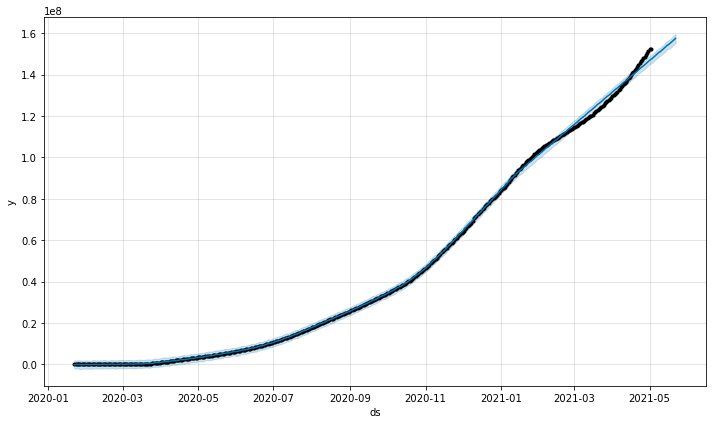

In [43]:
confirmed_forecast_plot = m.plot(forecast)

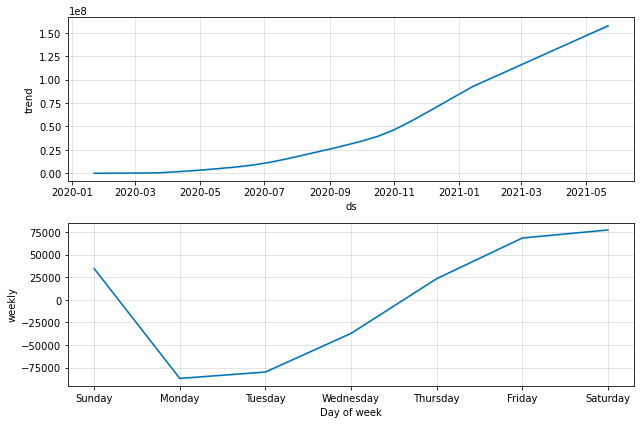

In [44]:
confirmed_forecast_plot= m.plot_components(forecast)

# prediction of deaths

In [45]:
death.columns = ['ds','y']
death['ds'] = pd.to_datetime(death['ds'])

In [46]:
m = Prophet(interval_width=0.95)
m.fit(death)
future = m.make_future_dataframe(periods=131)
future.tail(30)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
568,2021-08-12
569,2021-08-13
570,2021-08-14
571,2021-08-15
572,2021-08-16
573,2021-08-17
574,2021-08-18
575,2021-08-19
576,2021-08-20
577,2021-08-21


In [47]:
forecast = m.predict(future)

In [48]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,-886.290,-16639.430,15206.281,-886.290,-886.290,-59.159,-59.159,-59.159,-59.159,-59.159,-59.159,0.000,0.000,0.000,-945.448
1,2020-01-23,-785.657,-16407.606,15933.459,-785.657,-785.657,961.929,961.929,961.929,961.929,961.929,961.929,0.000,0.000,0.000,176.272
2,2020-01-24,-685.025,-12835.598,16493.704,-685.025,-685.025,1890.450,1890.450,1890.450,1890.450,1890.450,1890.450,0.000,0.000,0.000,1205.425
3,2020-01-25,-584.392,-14995.368,17025.855,-584.392,-584.392,1575.478,1575.478,1575.478,1575.478,1575.478,1575.478,0.000,0.000,0.000,991.086
4,2020-01-26,-483.760,-17267.376,15076.560,-483.760,-483.760,-486.080,-486.080,-486.080,-486.080,-486.080,-486.080,0.000,0.000,0.000,-969.841
5,2020-01-27,-383.128,-19583.126,12369.757,-383.128,-383.128,-2502.244,-2502.244,-2502.244,-2502.244,-2502.244,-2502.244,0.000,0.000,0.000,-2885.371
6,2020-01-28,-282.495,-16901.390,12887.329,-282.495,-282.495,-1380.374,-1380.374,-1380.374,-1380.374,-1380.374,-1380.374,0.000,0.000,0.000,-1662.870
7,2020-01-29,-181.863,-16542.723,15579.045,-181.863,-181.863,-59.159,-59.159,-59.159,-59.159,-59.159,-59.159,0.000,0.000,0.000,-241.022
8,2020-01-30,-81.231,-14827.071,17590.455,-81.231,-81.231,961.929,961.929,961.929,961.929,961.929,961.929,0.000,0.000,0.000,880.699
9,2020-01-31,19.402,-14702.871,19203.784,19.402,19.402,1890.450,1890.450,1890.450,1890.450,1890.450,1890.450,0.000,0.000,0.000,1909.852


In [49]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(140)

,ds,yhat,yhat_lower,yhat_upper
458,2021-04-24,3081782.773,3066952.405,3096847.240
459,2021-04-25,3089821.983,3074439.978,3106144.500
460,2021-04-26,3097906.589,3082413.229,3113306.676
461,2021-04-27,3109129.227,3093642.237,3124672.080
462,2021-04-28,3120551.212,3105887.746,3136247.641
463,2021-04-29,3131673.069,3115440.940,3147293.657
464,2021-04-30,3142702.358,3126883.829,3157912.507
465,2021-05-01,3152488.156,3137834.857,3167497.712
466,2021-05-02,3160527.366,3144700.229,3177138.576
467,2021-05-03,3168611.972,3152539.500,3184874.197


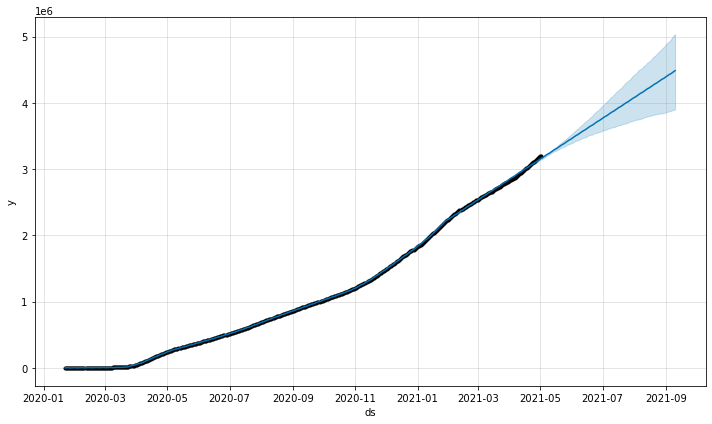

In [50]:
death_forecast_plot = m.plot(forecast)

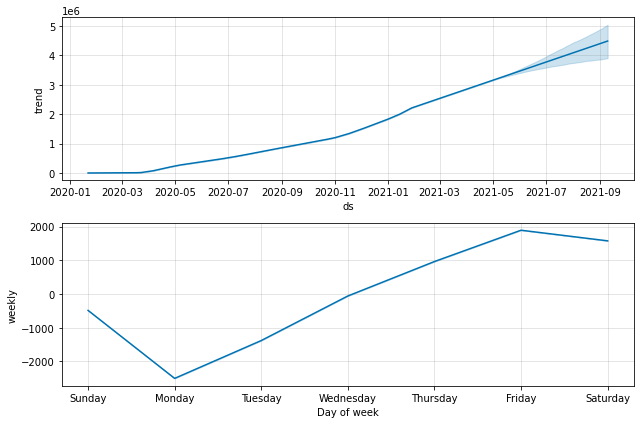

In [51]:
death_forecast_plot = m.plot_components(forecast)

##4.3 Forecasting Worldwide Recovered Cases with Prophet (Base model)

Generating a week ahead forecast of confirmed cases of NCOVID-19 using Prophet, with 95% prediction interval by creating a base model with no tweaking of seasonality-related parameters and additional regressors.

In [52]:
recovered.columns = ['ds','y']
recovered['ds'] = pd.to_datetime(recovered['ds'])

In [53]:
m = Prophet(interval_width=0.95)
m.fit(recovered)
future = m.make_future_dataframe(periods=131)
future.tail(20)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
578,2021-08-22
579,2021-08-23
580,2021-08-24
581,2021-08-25
582,2021-08-26
583,2021-08-27
584,2021-08-28
585,2021-08-29
586,2021-08-30
587,2021-08-31


In [54]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(140)

,ds,yhat,yhat_lower,yhat_upper
458,2021-04-24,82422161.078,80708202.147,84042964.422
459,2021-04-25,82738437.879,81037439.079,84562907.885
460,2021-04-26,83002710.140,81504398.681,84603288.685
461,2021-04-27,83258013.293,81670960.605,84949223.670
462,2021-04-28,83609461.574,81898258.665,85265742.014
463,2021-04-29,83948297.146,82365620.418,85583724.337
464,2021-04-30,84278651.974,82554988.033,85902179.261
465,2021-05-01,84646313.930,82997320.109,86256848.948
466,2021-05-02,84962590.732,83373722.716,86581722.283
467,2021-05-03,85226862.992,83556114.152,86855260.414


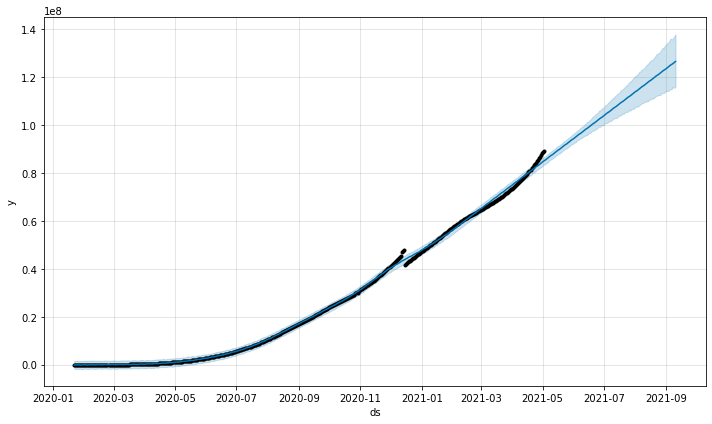

In [55]:
recovered_forecast_plot = m.plot(forecast)

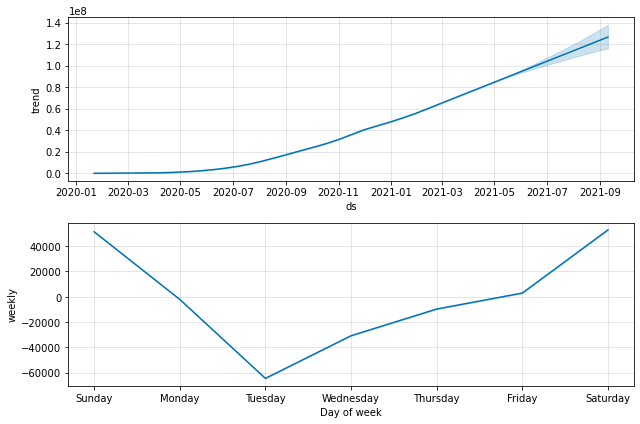

In [56]:
recovered_forecasting_plot = m.plot_components(forecast)